In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

'automobile'

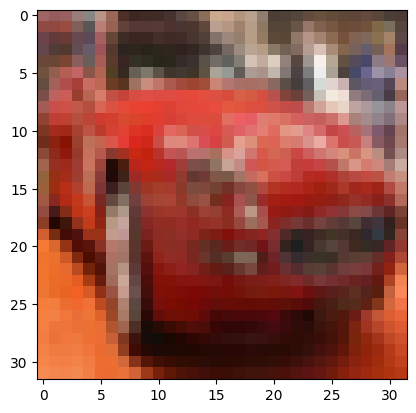

In [ ]:
(trainX , trainY) , (testX , testY) = cifar10.load_data()
class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship","truck"]
trainY = np.array([i[0] for i in trainY])   #Converting the labelled data from 2D to 1D : [[6],[5],..] -> [6,5,...]
testY = np.array([i[0] for i in testY])
plt.imshow(trainX[5])
class_labels[trainY[5]]


# Feature Scaling so that pixels lie between 0 and 1

In [ ]:
trainX_scaled,testX_scaled = trainX/255.0 , testX/255.0  #Maxi,um pixel value is 255
trainX_scaled.shape

(50000, 32, 32, 3)

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32,32,3)),
    data_augmentation,

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
      metrics = ['accuracy'],
      loss = 'sparse_categorical_crossentropy',
      optimizer = 'adam'
)

# Converting the Class Labels into One Hot Encoded
like 3 -> [0,0,0,1,0,0,0,0,0]

In [ ]:
train_encodedY,test_encodedY = tf.keras.utils.to_categorical(trainY), tf.keras.utils.to_categorical(testY)
trainY

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
model.fit(trainX_scaled,trainY,epochs= 100,validation_split=0.2,batch_size=50)

Epoch 1/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.6665 - loss: 0.9862 - val_accuracy: 0.6979 - val_loss: 0.9008
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6706 - loss: 0.9553 - val_accuracy: 0.7311 - val_loss: 0.8143
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6893 - loss: 0.9114 - val_accuracy: 0.6877 - val_loss: 0.9582
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6978 - loss: 0.8822 - val_accuracy: 0.6593 - val_loss: 1.0496
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7036 - loss: 0.8749 - val_accuracy: 0.7384 - val_loss: 0.7827
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7089 - loss: 0.8691 - val_accuracy: 0.7098 - val_loss: 0.8901
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7200 - loss: 0.8334 - val_accuracy: 0.7373 - val_loss: 0.8314
Epoch 8/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7215 - loss: 0

In [ ]:
pred = model.predict(testX_scaled)

print(f"Predicted class is : {class_labels[np.argmax(pred[15])]}")
print(f"True class is      : {class_labels[testY[15]]}")
model.evaluate(testX_scaled,testY)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted class is : ship
True class is      : ship
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8281 - loss: 0.6424


[0.652991771697998, 0.8233000040054321]

In [ ]:
c = model.predict(testX_scaled)
predictions = np.array([class_labels[np.argmax(i)] for i in c])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
truth = np.array([class_labels[i] for i in testY])
print(classification_report(truth,predictions))


              precision    recall  f1-score   support

    airplane       0.81      0.87      0.84      1000
  automobile       0.92      0.91      0.92      1000
        bird       0.75      0.81      0.78      1000
         cat       0.72      0.63      0.67      1000
        deer       0.77      0.81      0.79      1000
         dog       0.83      0.68      0.74      1000
        frog       0.83      0.88      0.85      1000
       horse       0.85      0.88      0.87      1000
        ship       0.93      0.85      0.89      1000
       truck       0.82      0.92      0.86      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



<Axes: >

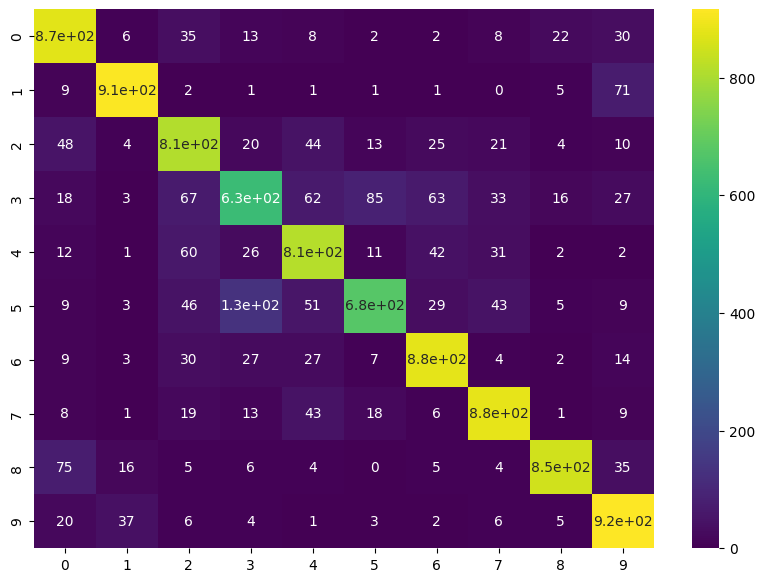

In [ ]:
cm = confusion_matrix(truth,predictions)
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,cmap='viridis')